In [1]:
import array
import pickle

def getTextFromCooc(pathToFile):
    with open(pathToFile, 'r', encoding='utf8') as f:
        indexRow = 0
        headerText = []
        docs = []
        for row in f:
            if(indexRow == 0):
                for word in row.split(','):
                    headerText.append(word)
            else:
                indexNumber = 0
                isStringCreated = False
                for word2 in row.split(','):
                    if(indexNumber == 0):
                        pass
                    else:
                        if int(word2) == 1:
                            if(isStringCreated == False):
                                string = ''
                                isStringCreated = True
                            if(string == ""):
                                string = headerText[indexNumber-1]
                            else:
                                string = string +' '+headerText[indexNumber-1]
                    indexNumber += 1
                #string = string[2:]
                docs.append(string)
                docs = [s.replace("'", '"') for s in docs] # remove all the 8s 
            indexRow +=1
    with open('./docs/textTheGoodScents.txt','wb') as f:
        pickle.dump(docs, f)
    return [docs,headerText]

docs,headerText = getTextFromCooc('./TGS/dataTGS.csv')
indice = 0
for doc in docs:
    docSplitted = doc.split(' ')
    docs[indice] = docSplitted
    indice += 1

meanWindow = 0;
for doc in docs:
    meanWindow += len(doc)
meanWindow = meanWindow / len(docs) 
print(meanWindow)

4.563087688607041


In [13]:
import gensim, logging
logging.info("Start to generate model for skip gram size 300")

logging.info("Generating skip-gram 300...")
mymodel = gensim.models.Word2Vec(docs,size=30,min_count=1,batch_words=60,window = 7)
mymodel.save("./model/word2vec300SG")

In [14]:
embedded_mat = []
for word in mymodel.wv.vocab:
    embedded_mat.append(mymodel.wv[word])

In [15]:
import numpy as np
embedded_mat = np.array(embedded_mat)
embedded_mat.shape

(381, 30)

In [16]:
for word in mymodel.wv.vocab:
    if word == 'tilleul':
        print(mymodel.wv[word])

print(mymodel.wv['tequila'])
meanDist = 0
for word in mymodel.wv.vocab:
    meanDist += mymodel.wv.distance(word,'fruité')
print(meanDist/381)

for word in mymodel.wv.vocab:
    meanDist += mymodel.wv.distance(word,'tilleul')
print(meanDist/381)

[-0.00522176 -0.02830269 -0.0218707   0.01727783  0.00817312 -0.04195762
 -0.01025915  0.00321362 -0.00174023 -0.02154218 -0.04493264 -0.00027258
  0.03256034  0.00932679  0.00118942  0.0179462   0.01820271 -0.01514862
  0.00211261 -0.00208831  0.00474694 -0.02632702  0.08357132 -0.03153123
 -0.03685824  0.01354903  0.02989166  0.00610571  0.02223483  0.01657008]
[-0.00619179 -0.00478715  0.00785907 -0.01380612 -0.00784125 -0.00556318
 -0.00427749  0.01350032 -0.00383601 -0.00031934 -0.00941265  0.01213634
 -0.00393352  0.01050805  0.01137749 -0.00477699  0.01546384 -0.01969212
  0.00531851 -0.00812399 -0.00509951 -0.0075074   0.02484378 -0.01812815
 -0.02931158  0.01665542  0.01255276  0.01722285  0.01272602  0.01234635]
0.027024342671154052
0.12670868535445431


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 381 samples in 0.000s...
[t-SNE] Computed neighbors for 381 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 381 / 381
[t-SNE] Mean sigma: 0.010936
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 66.9370956, gradient norm = 0.0000001 (50 iterations in 0.104s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 66.937096
[t-SNE] Iteration 100: error = 2.4936252, gradient norm = 0.0105249 (50 iterations in 0.097s)
[t-SNE] Iteration 150: error = 2.1298583, gradient norm = 0.0031902 (50 iterations in 0.069s)
[t-SNE] Iteration 200: error = 2.0341773, gradient norm = 0.0013408 (50 iterations in 0.068s)
[t-SNE] Iteration 250: error = 1.9897048, gradient norm = 0.0007334 (50 iterations in 0.070s)
[t-SNE] Iteration 300: error = 1.9682474, gradient norm = 0.0005519 (50 iterations in 0.070s)
[t-SNE] Iteration 

D:\IDE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\IDE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


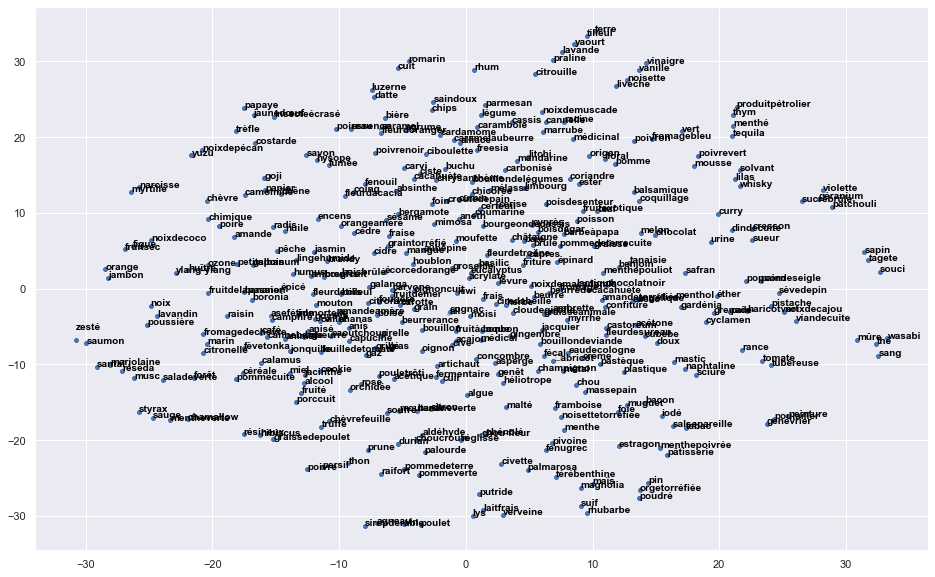

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
def getCosineMatrix(emb):
    matrix = pairwise_distances(emb, metric='cosine', n_jobs=-1)
    return np.abs(matrix)

cosine_matrix = getCosineMatrix(embedded_mat)


tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=2000,perplexity=10,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(cosine_matrix)

df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
for line in range(0,embedded_mat.shape[0]):
     p1.text(df_subset['tsne-2d-one'][line]+0.01, df_subset['tsne-2d-two'][line], 
     headerText[line], horizontalalignment='left', 
     size='small', color='black', weight='semibold')
